In [3]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np



(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [33]:
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

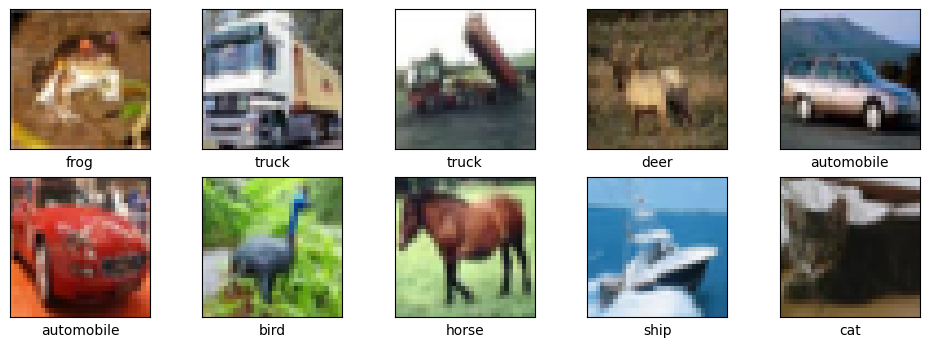

In [35]:
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # y_train[i] is the one-hot encoded label, find the index of the max value
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [4]:
from keras import regularizers

In [37]:
model = Sequential()
model.add(Conv2D(50,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.add(Conv2D(75,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [39]:
model.add(Conv2D(125,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [40]:
model.add(Conv2D(150, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [41]:
model.add(Flatten())
model.add(Dense(500,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))

In [42]:
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.2741 - loss: 2.3515 - val_accuracy: 0.5490 - val_loss: 1.3951
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5439 - loss: 1.4125 - val_accuracy: 0.6654 - val_loss: 1.0961
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6394 - loss: 1.1715 - val_accuracy: 0.6994 - val_loss: 1.0131
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6906 - loss: 1.0631 - val_accuracy: 0.7288 - val_loss: 0.9605
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7152 - loss: 0.9907 - val_accuracy: 0.7482 - val_loss: 0.9000
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7345 - loss: 0.9351 - val_accuracy: 0.7568 - val_loss: 0.8774
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7485 - loss: 0.9023 - val_accuracy: 0.7509 - val_loss: 0.8996
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7616 - loss: 0.8754 - val_a

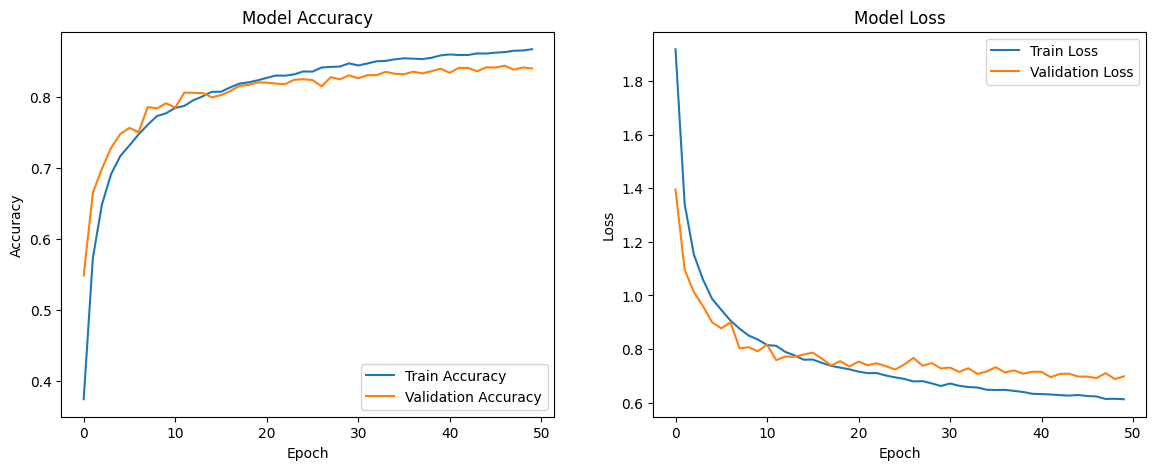

In [43]:
history=model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [48]:
import keras_tuner as kt
from keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = models.Sequential()

    # Conv2D layers with tunable filters near your original values
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', 45, 55, step=5),  # around 50
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(32,32,3)
    ))
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', 70, 80, step=5),  # around 75
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(hp.Float('dropout1', 0.2, 0.3, step=0.05)))  # around 0.25

    model.add(layers.Conv2D(
        filters=hp.Int('conv3_filters', 120, 130, step=5),  # around 125
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(hp.Float('dropout2', 0.2, 0.3, step=0.05)))  # around 0.25

    model.add(layers.Conv2D(
        filters=hp.Int('conv4_filters', 145, 155, step=5),  # around 150
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(hp.Float('dropout3', 0.2, 0.3, step=0.05)))  # around 0.25

    model.add(layers.Flatten())

    model.add(layers.Dense(
        units=hp.Int('dense1_units', 450, 550, step=50),  # around 500
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(layers.Dropout(hp.Float('dropout4', 0.35, 0.45, step=0.05)))  # around 0.4

    model.add(layers.Dense(
        units=hp.Int('dense2_units', 225, 275, step=25),  # around 250
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001)
    ))
    model.add(layers.Dropout(hp.Float('dropout5', 0.25, 0.35, step=0.05)))  # around 0.3

    model.add(layers.Dense(10, activation='softmax'))

    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    return model

# Create tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='cifar10_exact_tuning'
)

# Run search (use your existing x_train, y_train, x_test, y_test)
tuner.search(x_train, y_train,
             epochs=10,
             batch_size=128,
             validation_data=(x_test, y_test))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(best_hp.values)


Trial 15 Complete [00h 01m 44s]
val_accuracy: 0.7883999943733215

Best val_accuracy So Far: 0.8015000224113464
Total elapsed time: 00h 28m 13s
Best hyperparameters found:
{'conv1_filters': 50, 'conv2_filters': 80, 'dropout1': 0.25, 'conv3_filters': 120, 'dropout2': 0.2, 'conv4_filters': 145, 'dropout3': 0.25, 'dense1_units': 500, 'dropout4': 0.35, 'dense2_units': 275, 'dropout5': 0.3, 'learning_rate': 0.0005181886188307158}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras import regularizers
from tensorflow.keras.optimizers import Adam

# Build model with best parameters
model = Sequential()
model.add(Conv2D(50, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(80, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(120, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(145, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.35))
model.add(Dense(275, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Compile with best learning rate
optimizer = Adam(learning_rate=0.000518)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.2640 - loss: 2.5422 - val_accuracy: 0.5059 - val_loss: 1.5933
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5217 - loss: 1.5238 - val_accuracy: 0.6343 - val_loss: 1.2181
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6288 - loss: 1.2272 - val_accuracy: 0.6849 - val_loss: 1.0833
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6864 - loss: 1.0674 - val_accuracy: 0.7245 - val_loss: 0.9650
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7191 - loss: 0.9697 - val_accuracy: 0.7455 - val_loss: 0.9112
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7411 - loss: 0.9079 - val_accuracy: 0.7711 - val_loss: 0.8374
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7658 - loss: 0.8473 - val_accuracy: 0.7752 - val_loss: 0.8382
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7759 - loss: 0.8153 - va

In [45]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00
